In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from IPython.display import Audio

tfrecords_filename = 'D:/Documents/nsynth/nsynth-train.tfrecord'

In [2]:
def nsynth_generator(tfrecords_filename):
    for serialized_example in tf.python_io.tf_record_iterator(tfrecords_filename):
        example = tf.train.Example()
        example.ParseFromString(serialized_example)
        f = example.features.feature
        i=0
#         result = tf.train.Example.FromString(serialized_example)
#         print(result)
        data_array = []

        audio = np.array(f['audio'].float_list.value)

        data = {
            'note':
                f['note'].int64_list.value[i],
            'note_str':
                f['note_str'].bytes_list.value[i],
            'instrument':
                f['instrument'].int64_list.value[i],
            'instrument_str':
                f['instrument_str'].bytes_list.value[i],
            'pitch':
                f['pitch'].int64_list.value[i],
            'velocity':
                f['pitch'].int64_list.value[i],
            'samplerate':
                f['sample_rate'].int64_list.value[i],
            'audio':
                np.array(f['audio'].float_list.value),
            'qualities':
                np.array(f['qualities'].int64_list.value),
            'qualities_str':
                np.array(f['qualities_str'].int64_list.value),
            'instrument_family':
                f['instrument_family'].int64_list.value[i],
            'instrument_family_str':
                f['instrument_family_str'].bytes_list.value[i],
            'instrument_source':
                f['instrument_family'].int64_list.value[i],
            'instrument_source_str':
                f['instrument_source_str'].bytes_list.value[i],
        }
#         print(data)

        yield data, audio

In [13]:
gen_samples = nsynth_generator(tfrecords_filename)
metadata, audio = next(gen_samples)
metadata, audio = next(gen_samples)
metadata, audio = next(gen_samples)

64000


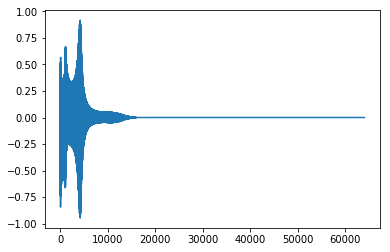

In [14]:
print(len(audio))
Audio(audio, rate=metadata['samplerate'])
plt.plot(audio)

In [ ]:
for example in tf.python_io.tf_record_iterator(tfrecords_filename):
    result = tf.train.Example.FromString(example)
    print(result)